In [55]:
# pip install dython

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dython
sns.set_theme()

In [57]:
# loading the dataset
df= pd.read_csv("train.csv")

In [58]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [59]:
df.Name.str.strip().str.split(" ",expand = True)[1]

0        Mr.
1       Mrs.
2      Miss.
3       Mrs.
4        Mr.
       ...  
886     Rev.
887    Miss.
888    Miss.
889      Mr.
890      Mr.
Name: 1, Length: 891, dtype: object

In [60]:
df.shape

(891, 12)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
df.isna().sum()  # 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [63]:
df.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [64]:
df['title'] = df.Name.str.split('([a-zA-Z ]+)', n=3, expand = True).rename({3:'title'},axis =1).title

In [65]:
df['lastname'] = df.Name.str.split('([a-zA-Z ]+)', n=3, expand = True).rename({3:'title'},axis =1).rename({1: 'lastname'},axis =1).lastname

In [66]:
df = df.reindex(['PassengerId','Survived','Pclass','title',"lastname",'Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis =1)

In [67]:
df.loc[:, ['title','lastname', 'Age','Cabin','Pclass']].sort_values('Cabin')

,title,lastname,Age,Cabin,Pclass
583,Mr,Ross,36.0,A10,1
475,Mr,Clifford,NaN,A14,1
556,Lady,Duff Gordon,48.0,A16,1
284,Mr,Smith,NaN,A19,1
599,Sir,Duff Gordon,49.0,A20,1
...,...,...,...,...,...
884,Mr,Sutehall,25.0,NaN,3
885,Mrs,Rice,39.0,NaN,3
886,Rev,Montvila,27.0,NaN,2
888,Miss,Johnston,NaN,NaN,3


In [68]:
df.lastname.nunique()

658

# How many survived from the data set by Gender

In [69]:
female = df.loc[:, ["Survived", 'Sex']][df.loc[:, ["Survived", 'Sex']].Sex == 'female']
male = df.loc[:, ["Survived", 'Sex']][df.loc[:, ["Survived", 'Sex']].Sex == 'male']

In [70]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

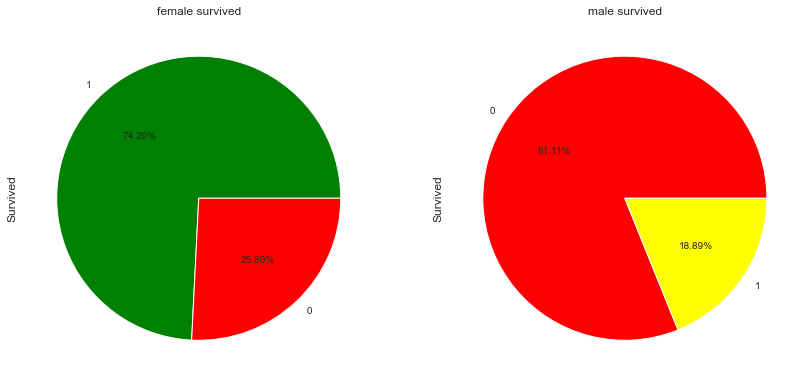

In [71]:
fig,(ax1,ax2)= plt.subplots(figsize =(14,10), nrows = 1, ncols = 2)
female.Survived.value_counts().plot(kind = 'pie', autopct = '%1.2f%%',fontsize = 10, ax=ax1,colors = ("green","red"))
male.Survived.value_counts().plot(kind = 'pie', autopct = '%1.2f%%',fontsize = 10, ax=ax2,colors = ("red","yellow"))
ax1.set(title = 'female survived')
ax2.set(title = 'male survived');

# Age category that survived

In [72]:
df['age_category'] = df.Age.apply(lambda x: "0-2" if 0 <= x<2 else
                                            "2-5" if 2<= x<= 5 else
                                            "6-13" if 5< x< 13 else
                                            "13-18" if 13<= x< 18 else
                                            "18-30" if 18<= x< 30 else
                                            "30-40" if 30<= x< 40 else
                                            "40-50" if 40<= x< 50 else
                                            "50-65" if 50<= x< 65 else
                                            "65+" if x>= 65 else "not known"
                                         )

In [73]:
age_cat = df.loc[:,['Sex','Survived', 'age_category']].set_index('age_category').reset_index().pivot_table\
(index = 'age_category', columns = 'Sex', values = 'Survived', aggfunc = 'count').sort_values('age_category',ascending = True)

In [74]:
age_cat

Sex,female,male
age_category,,
0-2,4.0,10.0
13-18,23.0,21.0
18-30,92.0,179.0
2-5,17.0,13.0
30-40,60.0,107.0
40-50,32.0,57.0
50-65,22.0,41.0
6-13,11.0,14.0
65+,NaN,11.0


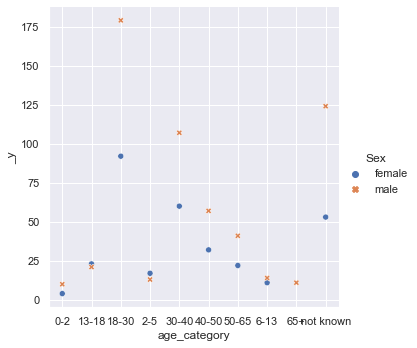

In [75]:
sns.relplot(data = age_cat)

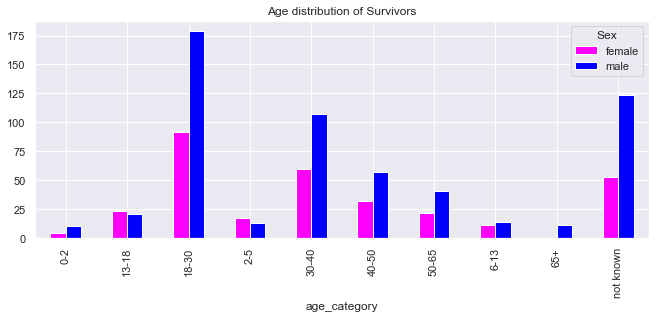

In [76]:
fig,ax = plt.subplots(figsize =(11,4))
age_cat.plot(kind = 'bar',ax=ax, color = ("magenta","blue"))
ax.set(title = 'Age distribution of Survivors');

# Some Statistical validation

In [77]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [78]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

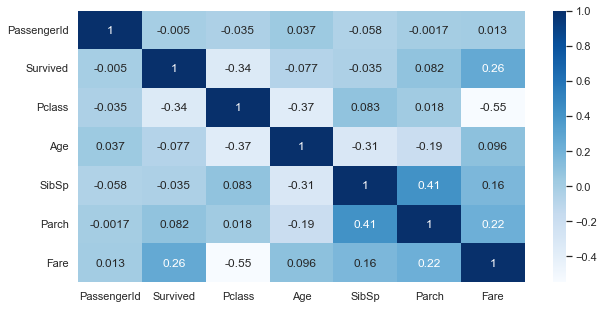

In [79]:
fig,ax = plt.subplots(figsize = (10,5))
sns.heatmap(df.corr(), annot = True, cmap="Blues")

In [80]:
from dython.nominal import associations

In [81]:
#associations(df,figsize = (20,10))

# Cleaning up data to fillna

In [82]:
# we will fill tha age with median
df.Age = df.Age.fillna(df.Age.mean()).astype(int)

In [83]:
df.Cabin = df.Cabin.fillna("missing")

In [84]:
df.Embarked  =  df.Embarked.fillna("missing")

In [85]:
df.Cabin.isna().sum()

0

In [86]:
df.isna().sum()

PassengerId     0
Survived        0
Pclass          0
title           0
lastname        0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
age_category    0
dtype: int64

# Features and target

In [87]:
X = df.loc[:,["Pclass","Age","SibSp","Parch","Fare","Embarked"]].reset_index(drop = True)
y = df.Survived
X.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked
0,3,22,1,0,7.2500,S
1,1,38,1,0,71.2833,C
2,3,26,0,0,7.9250,S
3,1,35,1,0,53.1000,S
4,3,35,0,0,8.0500,S


# **Preprocessing**

In [88]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown ='ignore'),["Embarked"]),
    remainder='passthrough')

transformedX = transformer.fit_transform(X)
pd.DataFrame(transformedX).head()

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500
1,1.0,0.0,0.0,0.0,1.0,38.0,1.0,0.0,71.2833
2,0.0,0.0,1.0,0.0,3.0,26.0,0.0,0.0,7.9250
3,0.0,0.0,1.0,0.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,0.0,1.0,0.0,3.0,35.0,0.0,0.0,8.0500


# With RandomForestClassifier

In [89]:
# import estimator
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
X_train, X_test ,y_train ,y_test = train_test_split (transformedX, y, test_size = 0.2,random_state =34)  

# instantiate and fit
clf = RandomForestClassifier(n_estimators=300, max_depth=13, random_state=0 )

clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=13, n_estimators=300, random_state=0)

In [90]:
clf.score(X_test, y_test)  , clf.score(X_train, y_train)  

(0.7430167597765364, 0.9367977528089888)

# Lets predict

In [91]:
y_preds = clf.predict(X_test)

In [92]:
y_preds

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1], dtype=int64)

In [93]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [94]:
accuracy_score(y_test, y_preds)

0.7430167597765364

In [95]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       118
           1       0.63      0.61      0.62        61

    accuracy                           0.74       179
   macro avg       0.71      0.71      0.71       179
weighted avg       0.74      0.74      0.74       179



<AxesSubplot:>

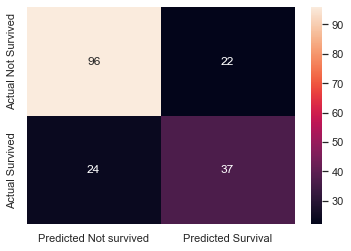

In [96]:
cm = confusion_matrix(y_test, y_preds)
pd.DataFrame(cm, columns = ['Predicted Not survived', 'Predicted Survival'], index = ['Actual Not Survived', 'Actual Survived'])
sns.heatmap(pd.DataFrame(cm, columns = ['Predicted Not survived', 'Predicted Survival'], index = ['Actual Not Survived', 'Actual Survived']), annot = True, fmt= 'd')

# Save Model with joblib

In [97]:
from joblib import dump, load
dump(clf, 'model.joblib')

['model.joblib']

# Testing the model on the test dataset

In [98]:
df_test = pd.read_csv("test.csv")

In [99]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [100]:
df_test.Cabin = df_test.Cabin.fillna('missing')
df_test.Fare = df_test.Fare .fillna(df_test.Fare.mean())
df_test.Age = df_test.Age .fillna(df_test.Age.mean())

In [101]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [102]:
Xn= df_test.drop(["PassengerId","Name","Sex","Ticket","Cabin"],axis = 1)

In [103]:
Xn.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked
0,3,34.5,0,0,7.8292,Q
1,3,47.0,1,0,7.0000,S
2,2,62.0,0,0,9.6875,Q
3,3,27.0,0,0,8.6625,S
4,3,22.0,1,1,12.2875,S


# Load the Model

In [104]:
model_load = load('model.joblib')

In [105]:
transformedXn = transformer.fit_transform(Xn)
pd.DataFrame(transformedXn).head()

,0,1,2,3,4,5,6,7
0,0.0,1.0,0.0,3.0,34.5,0.0,0.0,7.8292
1,0.0,0.0,1.0,3.0,47.0,1.0,0.0,7.0000
2,0.0,1.0,0.0,2.0,62.0,0.0,0.0,9.6875
3,0.0,0.0,1.0,3.0,27.0,0.0,0.0,8.6625
4,0.0,0.0,1.0,3.0,22.0,1.0,1.0,12.2875


In [106]:
X.shape, Xn.shape, X_test.shape , transformedXn.shape

((891, 6), (418, 6), (179, 9), (418, 8))

In [107]:
model_load.predict(transformedXn)

ValueError: X has 8 features, but RandomForestClassifier is expecting 9 features as input.